In [17]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [19]:
#feed forward network with a single hidden layer
model = Sequential([
    Dense(64,activation='relu',input_shape=(784,)), 
# 64 units in this hidden layer, if you don't pass any activation, the dense layer will have a linear activation or no activation by default
#each input data example will be a 1D vector of size 784, in this case,the weights and biases will be created and initialized straight away   
    Dense(10,activation='softmax')
#output layer has 10 units, a model for classification task where there're 10 classes
])

#here is another way for building the exact same model
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

#model 2
model = Sequential([
#flattening each data input to unroll it into a long 1D vector of size 784 
#before sending it through to the first dense layer    
    Flatten(input_shape=(28,28)), #(784,)
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

#### Build a feedforward neural network model

In [20]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16,activation='relu',name='layer_1'),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
])

In [21]:
# Print the model summary

model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.03465124, -0.06629299, -0.04463692, ...,  0.04418276,
         -0.01572247,  0.00884312],
        [-0.06348889,  0.05725411,  0.03005173, ..., -0.03789765,
          0.07384685,  0.04725166],
        [-0.08354749,  0.07658681,  0.03870599, ..., -0.01531265,
         -0.05990492,  0.03814995],
        ...,
        [ 0.06497176,  0.01672003,  0.05191079, ...,  0.03792373,
          0.0849939 ,  0.07345021],
        [ 0.04745512,  0.00892156, -0.03631592, ...,  0.00688674,
          0.07175867, -0.00252128],
        [ 0.00801199, -0.02447445, -0.06566113, ..., -0.00535578,
         -0.01625472, -0.00265259]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 2.17817694e-01,  2.03228146e-01,  9.68135297

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [24]:
model = Sequential([
#16 filters, 3 is the shape of convlutional kernel    
    Conv2D(16,3,activation='relu',input_shape=(32,32,3)), #(None,30,30,16),None is bec 1st dimension is always batch size
    MaxPooling2D((3,3)), #(None,10,10,16)
    Flatten(), #（None,1600)
    Dense(64,activation='relu'), #(None,64)
    Dense(10,activation='softmax') #(None,10)
])

In [25]:
model = Sequential([ 
    Conv2D(16,kernel_size=3,padding='SAME',
           activation='relu',input_shape=(32,32,3)), #(None,32,32,16),None is bec 1st dimension is always batch size
    MaxPooling2D(pool_size=3), #(None,10,10,16)
    Flatten(), #（None,1600)
    Dense(64,activation='relu'), #(None,64)
    Dense(10,activation='softmax') #(None,10)
])

In [26]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3),padding='SAME', strides=2,activation='relu',input_shape=(1,28,28),data_format='channels_first'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation="softmax")
])

In [73]:

model = Sequential([
    Conv2D(16,(3,3),padding='SAME', strides=2,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation="softmax")
])

In [74]:
# Print the model summary
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [29]:
#binary classification network
model = Sequential([
#fully connected layer with 64units, exponential linear unit activation function    
    Dense(64,activation='elu',input_shape=(32,)),
#a final dense layer with one neuron    
    Dense(1,activation='linear')
])

model.compile(
    optimizer='sgd', #'adam','rmsprop','adadelta'
    loss='binary_crossentropy', #'mean_squared_error','categorical_crossentropy (more appropriate for a regression task)'
#these metrics will be calculated for each epoch of training along with the evaluation of the loss function on the training data 
    metrics=['accuracy','mae'] #mean absolute error
)

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.7),tf.keras.metrics.MeanAbsoluteError()]
)


In [30]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#data labels are integers: sparse categorical crossentropy
#data labels are one-hot vectors: categorical crossentropy

In [31]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy


In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
print(model.optimizer.lr)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [75]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc,mae])

***
<a id="coding_tutorial_4"></a>
## The fit method

In [76]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(32,)),
    Dense(100,activation='softmax')
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train)
#X_train:(num_samples,num_features)
#y_train:(num_samples,num_classes) one-hot vectors

In [ ]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(32,)),
    Dense(100,activation='softmax')
])

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train)
#X_train:(num_samples,num_features)
#y_train:(num_samples,) 1D array with single interger for each label

history = model.fit(X_train,y_train,epochs=10,batch_size=16) #10 complete passes through the dataset
# train on minibatches of size 16

#### Load the data

In [77]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [78]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [79]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [ ]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.
test_images = test_images/255.

In [ ]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label:{labels[train_labels[i]]}")

#### Fit the model

In [ ]:
# Fit the model
#add a dummy channel dimension to the training images
#verbose=2:print one line per epoch; verbose=0:silent print out
#verbose=1 will show you an animated progress bar like this:
#progres_bar[======]
history = model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256,verbose=1)


#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

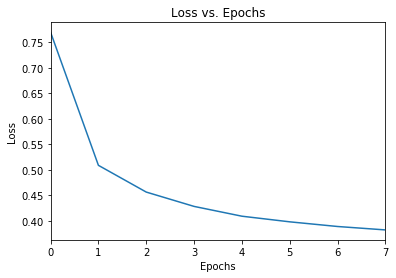

In [54]:
# Make a plot for the loss
loss_plot = df.plot(y="loss",title="Loss vs. Epochs",legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

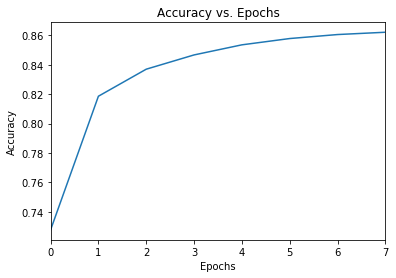

In [55]:
# Make a plot for the accuracy
accuracy_plot = df.plot(y="sparse_categorical_accuracy",title="Accuracy vs. Epochs",legend=False)
accuracy_plot.set(xlabel="Epochs",ylabel="Accuracy")


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

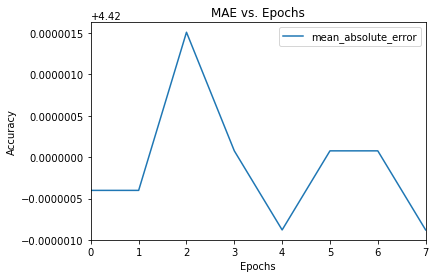

In [56]:
# Make a plot for the additional metric
metric_plot = df.plot(y='mean_absolute_error',title='MAE vs. Epochs')
metric_plot.set(xlabel='Epochs',ylabel='Accuracy')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [60]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
model= Sequential([Dense(1,activation='sigmoid',input_shape=(12,))])
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy','mae'])
model.fit(X_train,y_train)

loss,accuracy,mae = model.evaluate(X_test,y_test)

#X_sample:(num_samples,12),don't have corresponding labels
pred = model.predict(X_sample)
#if we're getting predictions in only 1 example, we have to have a dummy first dimension that will be equal to one
#our network is a binary classifier where the final layer has just 1 neuron passed through a sigmoid activation
#Then model.predict will return just 1 number that we interpreted as a probability that the input we passed in belongs to the positive class
#e.g.[[0.0077]]here prob is very low, so the model prediction would be that this input belongs to the negtive class

In [ ]:
# Evaluate the model
test_loss,test_accuracy,test_mae=model.evaluate(test_image[...,np.newaxis],test_labels,verbose=2)


#### Make predictions from the model

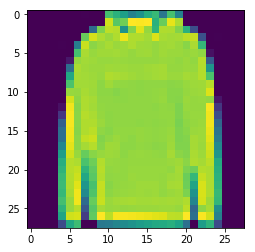

Label: Pullover


In [68]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

predictions=model.predict(test_image[np.newaxis,...,np.newaxis])


In [ ]:
print(f"Model prediction:{labels[np.argmax(predictions)]}")